In [188]:
# import all libraries
from tkinter import *
from tkinter import filedialog
import os
import numpy as np

In [189]:
# creating python gui to select txt file from windows explore for summarazation 
root = Tk()
my_filetypes = [('all files', '.*'), ('text files', '.txt')]
root.filename =  filedialog.askopenfilename(
                                    title="Please select a file:",
                                    filetypes=my_filetypes)
print ("File directory:",root.filename)
print("\n")
root.withdraw()
#text=open(root.filename, encoding="utf-8").read()
text=open(root.filename).read()
print(text)
print("\n")

File directory: C:/Users/jones_wp60lum/Downloads/test.txt



Our ultimate goal is to create a robust summarization system that can handle different types of documents in a uniform way. To achieve this goal, we
have developed a summarization system based on
sentence extraction. We have participated in evaluation workshops on automatic summarization for
both Japanese and English written corpora. We have
also evaluated the performance of the sentence extraction system for Japanese lectures. At both workshops we obtained some of the top results, and for
the speech corpus we obtained results comparable
with those for the written corpora. This means that
the features we use are worth analyzing.
Sentence extraction is one of the main methods
required for a summarization system to reduce the
size of a document. Edmundson (1969) proposed a
method of integrating several features, such as the
positions of sentences and the frequencies of words
in an article, in order to extract sentences. He manu

In [190]:
# dividing sentence into meaningful units
from nltk import sent_tokenize
sentences=(sent_tokenize(text))
print("Sentences:",sentences)
print("\n")

emptyarray= np.empty((len(sentences),1,3),dtype=object)
for s in range(len(sentences)):
    emptyarray[s][0][0] = sentences[s]
    emptyarray[s][0][1] = s

Sentences: ['\nOur ultimate goal is to create a robust summarization system that can handle different types of documents in a uniform way.', 'To achieve this goal, we\nhave developed a summarization system based on\nsentence extraction.', 'We have participated in evaluation workshops on automatic summarization for\nboth Japanese and English written corpora.', 'We have\nalso evaluated the performance of the sentence extraction system for Japanese lectures.', 'At both workshops we obtained some of the top results, and for\nthe speech corpus we obtained results comparable\nwith those for the written corpora.', 'This means that\nthe features we use are worth analyzing.', 'Sentence extraction is one of the main methods\nrequired for a summarization system to reduce the\nsize of a document.', 'Edmundson (1969) proposed a\nmethod of integrating several features, such as the\npositions of sentences and the frequencies of words\nin an article, in order to extract sentences.', 'He manually assig

In [191]:
# calculating and visualizing relationships between words
#Tokenization sentences,chopping it up into pieces throwing away certain characters, such as punctuation.
#Bi-grams

import nltk
from string import punctuation
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
bi_token=[]
bi_token_length=[]
tri_token_length=[]
for u in range(len(sentences)):
    sent_split1=[w.lower() for w in sentences[u].split(" ")]
    sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
    
    bigrams_list = [bigram for bigram in nltk.bigrams(sent_split)]
    bi_token.append(bigrams_list)
    bi_token_length.append(len(bi_token[u]))
bi_tokens = [(int(o) / max(bi_token_length))*100 for o in bi_token_length]
print("bitokens feature vector:",(bi_token_length))
print(max(bi_token_length))
print(bi_token_length)
print("\n")

bitokens feature vector: [12, 8, 9, 7, 11, 5, 9, 14, 9, 7, 0]
14
[12, 8, 9, 7, 11, 5, 9, 14, 9, 7, 0]




In [192]:
#Tri-grams
tri_token=[]
for u in range(len(sentences)):
    sent_split2=[w.lower() for w in sentences[u].split(" ")]
    sent_split3=[w for w in sent_split2 if w not in stop_words and w not in punctuation and not w.isdigit()]
    trigrams_list = [trigram for trigram in nltk.trigrams(sent_split3)]
    tri_token.append(trigrams_list)
    tri_token_length.append(len(tri_token[u]))
tri_tokens = [(int(m) / max(tri_token_length))*100 for m in tri_token_length]

print("tritokens feature vector:",tri_token_length)
print("\n")

tritokens feature vector: [11, 7, 8, 6, 10, 4, 8, 13, 8, 6, 0]




In [193]:
# getting Sentence Position
# getting total sentence
import math
def position(l):
    return [index for index, value in enumerate(sentences)]

sent_position= (position(sentences))
num_sent=len(sent_position)
print("sentence position:",sent_position)
print("\n")
print("Total number of sentences:",num_sent)
print("\n")

position = []
position_rbm = []
sent_pos1_rbm = 1
sent_pos1 = 100
position.append(sent_pos1)
position_rbm.append(sent_pos1_rbm)
for x in range(1,num_sent-1):
    s_p= ((num_sent-x)/num_sent)*100
    position.append(s_p)
    s_p_rbm = (num_sent-x)/num_sent
    position_rbm.append(s_p_rbm)
    
sent_pos2 = 100
sent_pos2_rbm = 1
position.append(sent_pos2)
position_rbm.append(sent_pos2_rbm)
print("Sentence position feature vector:",position_rbm)
print("\n")

sentence position: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Total number of sentences: 11


Sentence position feature vector: [1, 0.9090909090909091, 0.8181818181818182, 0.7272727272727273, 0.6363636363636364, 0.5454545454545454, 0.45454545454545453, 0.36363636363636365, 0.2727272727272727, 0.18181818181818182, 1]




In [194]:
#  Converting all Sentences to Vectors

def convertToVSM(sentences):
    vocabulary = []
    for sents in sentences:
        vocabulary.extend(sents)
    vocabulary = list(set(vocabulary))
    vectors = []
    for sents in sentences:
        vector = []
        for tokenss in vocabulary:
            vector.append(sents.count(tokenss))
        vectors.append(vector)
    return vectors
VSM=convertToVSM(sentences)
print("SentenceVectors:",VSM)
print("\n")

SentenceVectors: [[3, 7, 0, 0, 6, 1, 0, 0, 0, 0, 0, 7, 0, 2, 1, 3, 0, 20, 3, 1, 4, 0, 1, 3, 0, 1, 0, 12, 0, 0, 7, 1, 0, 0, 1, 0, 0, 6, 11, 1, 7, 6, 9], [2, 5, 0, 3, 3, 2, 0, 0, 0, 0, 0, 6, 0, 3, 1, 3, 1, 11, 3, 0, 0, 0, 1, 1, 1, 1, 0, 6, 0, 0, 5, 1, 1, 0, 1, 0, 0, 2, 8, 1, 6, 1, 13], [2, 9, 0, 2, 3, 1, 0, 0, 0, 0, 0, 10, 0, 4, 1, 3, 0, 14, 2, 0, 1, 0, 1, 0, 0, 2, 1, 9, 0, 0, 8, 1, 0, 1, 5, 1, 1, 7, 13, 1, 5, 3, 7], [3, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 5, 0, 3, 0, 4, 0, 12, 1, 0, 3, 0, 0, 1, 1, 0, 1, 8, 0, 0, 5, 0, 0, 1, 2, 0, 0, 5, 8, 1, 6, 2, 17], [3, 4, 0, 0, 2, 2, 1, 0, 0, 0, 0, 15, 0, 8, 0, 4, 0, 22, 3, 0, 3, 0, 0, 0, 0, 5, 0, 14, 0, 0, 4, 4, 1, 0, 6, 0, 1, 10, 6, 1, 10, 3, 15], [1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 1, 8, 0, 0, 1, 0, 1, 1, 0, 2, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 6, 1, 4, 2, 7], [0, 7, 0, 0, 6, 2, 0, 0, 0, 1, 1, 9, 0, 3, 2, 4, 0, 17, 4, 0, 3, 0, 0, 1, 1, 0, 0, 10, 0, 0, 7, 0, 0, 0, 0, 0, 0, 6, 6, 1, 6, 4, 15], [2, 8, 0, 1, 2, 3, 0, 1, 2, 0, 1, 12, 1, 4, 0,

In [195]:
# # TF-ISF feature and Centroid Calculation
# calulationg TF-ISF 
# calulationg Centroid
sentencelength=len(sentences)
def calcMeanTF_ISF(VSM, index):
    vocab_len = len(VSM[index])
    sentences_len = len(VSM)
    count = 0
    tfisf = 0
    for i in range(vocab_len):
        tf = VSM[index][i]
        if(tf>0):
            count += 1
            sent_freq = 0
            for j in range(sentences_len):
                if(VSM[j][i]>0): sent_freq += 1
            tfisf += (tf)*(1.0/sent_freq)
    if(count > 0):
        mean_tfisf = tfisf/count
    else:
        mean_tfisf = 0
    return tf, (1.0/sent_freq), mean_tfisf
tfvec=[]
isfvec=[]
tfisfvec=[]
tfisfvec_rbm=[]
for i in range(sentencelength):
    x,y,z=calcMeanTF_ISF(VSM,i)
    tfvec.append(x)
    isfvec.append(y)
    tfisfvec.append(z*100)
    tfisfvec_rbm.append(z)
print("TF vector:",tfvec)
print("\n")
print("ISF vector:",isfvec)
print("\n")
tfisf1= [(int(p)*100) for p in tfisfvec]
print("TF-ISF vector:",tfisfvec_rbm)
print("\n")
maxtf_isf=max(tfisfvec_rbm)
centroid=[]
centroid.append(maxtf_isf)
print("Max TF-ISF:",centroid)
print("\n")
centroid=(max(VSM))
print("Centroid:",centroid)
print("\n")

TF vector: [9, 13, 7, 17, 15, 7, 15, 21, 16, 11, 3]


ISF vector: [0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


TF-ISF vector: [0.513098124098124, 0.3781959809737587, 0.48611755308183885, 0.4298821548821548, 0.6797979797979798, 0.2896791039648183, 0.5799127640036731, 0.7693909137457525, 0.5196514837819186, 0.39248384465775765, 0.2232323232323232]


Max TF-ISF: [0.7693909137457525]


Centroid: [3, 7, 0, 1, 3, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 13, 1, 0, 4, 1, 4, 1, 0, 0, 0, 9, 0, 0, 8, 0, 0, 0, 1, 0, 0, 6, 10, 1, 10, 3, 16]




In [196]:
#  Cosine Similarity between Centroid and Sentences

from numpy import dot
from numpy.linalg import norm
cosine_similarity=[]
cosine_similarity_rbm=[]
for z in range(sentencelength):
    cos_simi = ((dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))*100)
    cosine_similarity.append(cos_simi)
    cos_simi_rbm = (dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))
    cosine_similarity_rbm.append(cos_simi_rbm)
print("Cosine Similarity Vector:",cosine_similarity_rbm)
print("\n")

Cosine Similarity Vector: [0.9205543395943993, 0.9464212327047882, 0.8842655864131671, 0.9492091474963417, 0.86040055019262, 0.9247754096995074, 0.9314258661725978, 0.9522510044675752, 0.9999999999999999, 0.9373768898266555, 0.7963491117322938]




In [197]:
# Sentence length feature

sent_word=[]
for u in range(len(sentences)):
    sent_split1=[w.lower() for w in sentences[u].split(" ")]
    sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
    a=(len(sent_split))
    sent_word.append(a)
print("Number of words in each sentence:",sent_word)
print("\n")
sent_leng=[]
for x in range(len(sentences)):
    if sent_word[x] < 3:
        sent_leng.append(0)
    else:
        sent_leng.append(1)

##OR BY THIS METHOD: LENGTH OF SENTENCE/ LONGEST SENTENCE
longest_sent=max(sent_word)
sent_length=[]
sent_length_rbm=[]
for x in sent_word:
    sent_length.append((x/longest_sent)*100)
    sent_length_rbm.append(x/longest_sent)
print(sent_length)

print("Sentence length feature vector:",sent_length_rbm)
print("\n")

Number of words in each sentence: [13, 9, 10, 8, 12, 6, 10, 15, 10, 8, 1]


[86.66666666666667, 60.0, 66.66666666666666, 53.333333333333336, 80.0, 40.0, 66.66666666666666, 100.0, 66.66666666666666, 53.333333333333336, 6.666666666666667]
Sentence length feature vector: [0.8666666666666667, 0.6, 0.6666666666666666, 0.5333333333333333, 0.8, 0.4, 0.6666666666666666, 1.0, 0.6666666666666666, 0.5333333333333333, 0.06666666666666667]




In [198]:
# Numeric token Feature

import re
num_word=[]
numeric_token=[]
numeric_token_rbm=[]
for u in range(len(sentences)):
    sent_split4=sentences[u].split(" ")
    e=re.findall("\d+",sentences[u])
    noofwords=(len(e))
    num_word.append(noofwords)
    numeric_token.append((num_word[u]/sent_word[u])*100)
    numeric_token_rbm.append(num_word[u]/sent_word[u])
#print("Numeric word count in each sentence:",num_word)
#print("\n")
print("Numeric token feature vector:",numeric_token_rbm)
print("\n")

Numeric token feature vector: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0]




In [199]:
#for Rapid Automatic Keyword Extraction algorithm
#algorithm which tries to determine key phrases in a body of text by analyzing 
#the frequency of word appearance and its co-occurance with other words in the text
from rake_nltk import Rake
r = Rake() 
keywords=[]

for s in sentences:
    r.extract_keywords_from_text(s)
    key=list(r.get_ranked_phrases())
    keywords.append(key)
print(keywords)
l_keywords=[]
for s in keywords:
    leng=len(s)
    l_keywords.append(leng)
print(l_keywords)

total_keywords=sum(l_keywords)
print(total_keywords)

thematic_number= []
thematic_number_rbm= []
for x in l_keywords:
    thematic_number.append((x/total_keywords)*100)
    thematic_number_rbm.append(x/total_keywords)
print("Thematic word feature", thematic_number_rbm)
print("\n")

[['robust summarization system', 'handle different types', 'uniform way', 'ultimate goal', 'documents', 'create'], ['summarization system based', 'sentence extraction', 'goal', 'developed', 'achieve'], ['english written corpora', 'evaluation workshops', 'automatic summarization', 'participated', 'japanese'], ['sentence extraction system', 'japanese lectures', 'also evaluated', 'performance'], ['obtained results comparable', 'top results', 'written corpora', 'speech corpus', 'obtained', 'workshops'], ['worth analyzing', 'use', 'means', 'features'], ['main methods required', 'summarization system', 'sentence extraction', 'size', 'reduce', 'one', 'document'], ['integrating several features', 'extract sentences', 'sentences', 'words', 'proposed', 'positions', 'order', 'method', 'frequencies', 'edmundson', 'article', '1969'], ['manually assigned parameter values', 'significance scores', 'integrate features', 'sentences', 'estimating'], ['machine learning methods', 'integrate features', 'han

In [200]:
# noun expractor
from nltk.tag import pos_tag
from collections import Counter
pncounts = []
pncounts_rbm = []
for sentence in sentences:
    tagged=nltk.pos_tag(nltk.word_tokenize(str(sentence)))
    counts = Counter(tag for word,tag in tagged if tag.startswith('NNP') or tag.startswith('NNPS'))
    f=sum(counts.values())
    pncounts.append(f)
    pncounts_rbm.append(f)
pnounscore=[(int(o) / int(p))*100 for o,p in zip(pncounts, sent_word)]
pnounscore_rbm=[int(o) / int(p) for o,p in zip(pncounts_rbm, sent_word)]
print(pncounts)
print("Pronoun feature vector",pnounscore_rbm)
print("\n")

[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0]
Pronoun feature vector [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0]




In [201]:

# # feature matrix1

featureMatrix = []
featureMatrix.append(position_rbm)
featureMatrix.append(bi_token_length)
featureMatrix.append(tri_token_length)
featureMatrix.append(tfisfvec_rbm)
featureMatrix.append(cosine_similarity_rbm)
featureMatrix.append(thematic_number_rbm)
featureMatrix.append(sent_length_rbm)
featureMatrix.append(numeric_token_rbm)
featureMatrix.append(pnounscore_rbm)

featureMat = np.zeros((len(sentences),9))
for i in range(9) :
    for j in range(len(sentences)):
        featureMat[j][i] = featureMatrix[i][j]

print("\n\n\nPrinting Feature Matrix : ")
print(featureMat)
print("\n\n\nPrinting Feature Matrix Normed : ")
#featureMat_normed = featureMat / featureMat.max(axis=0)
featureMat_normed = featureMat

print(featureMat_normed)
for i in range(len(sentences)):
    print(featureMat_normed[i])
#np.save('output_labels_10.npy',featureMat_normed)




Printing Feature Matrix : 
[[ 1.         12.         11.          0.51309812  0.92055434  0.1
   0.86666667  0.          0.        ]
 [ 0.90909091  8.          7.          0.37819598  0.94642123  0.08333333
   0.6         0.          0.        ]
 [ 0.81818182  9.          8.          0.48611755  0.88426559  0.08333333
   0.66666667  0.          0.2       ]
 [ 0.72727273  7.          6.          0.42988215  0.94920915  0.06666667
   0.53333333  0.          0.        ]
 [ 0.63636364 11.         10.          0.67979798  0.86040055  0.1
   0.8         0.          0.        ]
 [ 0.54545455  5.          4.          0.2896791   0.92477541  0.06666667
   0.4         0.          0.        ]
 [ 0.45454545  9.          8.          0.57991276  0.93142587  0.11666667
   0.66666667  0.          0.        ]
 [ 0.36363636 14.         13.          0.76939091  0.952251    0.2
   1.          0.06666667  0.06666667]
 [ 0.27272727  9.          8.          0.51965148  1.          0.08333333
   0.66666667

Fuzzy logic summary 

 ['\nOur ultimate goal is to create a robust summarization system that can handle different types of documents in a uniform way.', 'To achieve this goal, we\nhave developed a summarization system based on\nsentence extraction.', 'We have participated in evaluation workshops on automatic summarization for\nboth Japanese and English written corpora.', 'At both workshops we obtained some of the top results, and for\nthe speech corpus we obtained results comparable\nwith those for the written corpora.', 'Sentence extraction is one of the main methods\nrequired for a summarization system to reduce the\nsize of a document.', 'Edmundson (1969) proposed a\nmethod of integrating several features, such as the\npositions of sentences and the frequencies of words\nin an article, in order to extract sentences.', 'He manually assigned parameter values to integrate features\nfor estimating the significance scores of sentences.', 'On the other hand, machine learning methods can\n

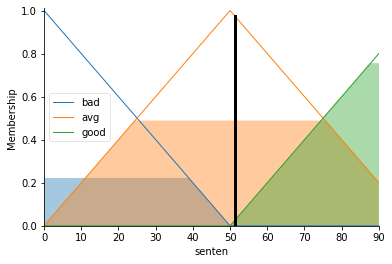

In [202]:
import numpy as np
import matplotlib
%matplotlib inline
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# objects hold universe variables and membership
# functions
position1 = ctrl.Antecedent(np.arange(0, 100, 10), 'position1')
cos_similarity = ctrl.Antecedent(np.arange(0, 100, 10), 'cos_similarity')
bitokens = ctrl.Antecedent(np.arange(0, 100, 10), 'bitokens')
tritokens = ctrl.Antecedent(np.arange(0, 100, 10), 'tritokens')
propernoun = ctrl.Antecedent(np.arange(0, 100, 10), 'propernoun')
sentencelength = ctrl.Antecedent(np.arange(0, 100, 10), 'sentencelength')
numtokens = ctrl.Antecedent(np.arange(0, 100, 10), 'numtokens')
keywords = ctrl.Antecedent(np.arange(0, 10, 1), 'keywords')
tf_isf = ctrl.Antecedent(np.arange(0, 100, 10), 'tf_isf')


senten = ctrl.Consequent(np.arange(0, 100, 10), 'senten')

position1.automf(3)
cos_similarity.automf(3)
bitokens.automf(3)
tritokens.automf(3)
propernoun.automf(3)
sentencelength.automf(3)
numtokens.automf(3)
keywords.automf(3)
tf_isf.automf(3)


senten['bad'] = fuzz.trimf(senten.universe, [0, 0, 50])
senten['avg'] = fuzz.trimf(senten.universe, [0, 50, 100])
senten['good'] = fuzz.trimf(senten.universe, [50, 100, 100])

rule1 = ctrl.Rule(position1['good'] & sentencelength['good'] & propernoun['good'] &numtokens['good'], senten['good'])
rule2 = ctrl.Rule(position1['poor'] & sentencelength['poor'] & numtokens['poor'], senten['bad'])
rule3 = ctrl.Rule(propernoun['poor'] & keywords['average'], senten['bad'])
rule4 = ctrl.Rule(cos_similarity['good'], senten['good'])
rule5 = ctrl.Rule(bitokens['good'] & tritokens['good'] & numtokens['average'] | tf_isf['average'], senten['avg'])


sent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
Sent = ctrl.ControlSystemSimulation(sent_ctrl)
fuzzemptyarr= np.empty((20,1,2), dtype=object)
t2=0
summary2=[]
for s in range(len(sentences)):
    Sent.input['position1'] = int(position[s])
    Sent.input['cos_similarity'] = int(cosine_similarity[s])
    Sent.input['bitokens'] = int(bi_tokens[s])
    Sent.input['tritokens'] = int(tri_tokens[s])
    Sent.input['tf_isf'] = int(tfisfvec[s])
    Sent.input['keywords'] = int(thematic_number[s])
    Sent.input['propernoun'] = int(pnounscore[s])
    Sent.input['sentencelength'] = int(sent_length[s])
    Sent.input['numtokens'] = int(numeric_token[s])
#Sent.input['service'] = 2
    Sent.compute()
    if Sent.output['senten'] > 50:
        summary2.append((sentences[s]))
        fuzzemptyarr[t2][0][0] = sentences[s]
        fuzzemptyarr[t2][0][1] = s
        t2+=1
fuzzarray = np.empty((len(summary2),1,2),dtype=object)
for i in range(len(summary2)):
    fuzzarray[i][0][0] = fuzzemptyarr[i][0][0]
    fuzzarray[i][0][1] = fuzzemptyarr[i][0][1]
    
fuzzarray=fuzzarray[1:]
print("Fuzzy logic summary \n\n",summary2)
print(len(summary2))
print(fuzzarray)
senten.view(sim=Sent)

In [245]:
!python -m spacy download en

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074438 sha256=2da0309cc44d10b6948c1e902ecb4f67e48d2f23bb11a8f8bf0907aff02043db
  Stored in directory: C:\Users\jones_wp60lum\AppData\Local\Temp\pip-ephem-wheel-cache-ww16c110\wheels\59\4f\8c\0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), 

You do not have sufficient privilege to perform this operation.


In [246]:
!pip install sumeval

In [248]:
# to perform the evaluation of the summarization
from sumevaL import RougeCalculator
from sumeval import BLEUCalculator

ModuleNotFoundError: No module named 'sumevaL'

In [ ]:

def eval_rouges(sentences,fuzzarray):
    rouge = RougeCalculator(stopwords=True, lang="en")

    rouge_1 = rouge.rouge_n(
                summary=fuzzarray,
                references=sentences,
                n=1)

    rouge_2 = rouge.rouge_n(
                summary=fuzzarray,
                references=[sentences],
                n=2)
    
    rouge_l = rouge.rouge_l(
                summary=fuzzarray,
                references=[sentences])
    
    # You need spaCy to calculate ROUGE-BE
    
    rouge_be = rouge.rouge_be(
                summary=fuzzarray,
                references=[sentences])

    bleu = BLEUCalculator()
    bleu_score = bleu.bleu( summary=fuzzarray,
                        references=[sentences])
    
    return rouge_1, rouge_2,rouge_l,rouge_be,bleu_score